In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
df = pd.read_csv("data/proccessed.csv", index_col=0)
df.head()

,id,party_name,descriptions,gender,is_foreigner,location,roots,lemmatized
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,554456,"['hasit', 'všerub', 'domažlice', 'ex', 'zastou...","['hasič', 'všerub', 'domažlice', 'ex', 'zastup..."
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,0,"['trávit', 'komora', 'Čech', 'republika', 'lob...","['potravinářský', 'komora', 'český', 'republik..."
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,0,"['umět', 'dirigovat']","['umělec', 'dirigent']"
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,0,"['umět', 'bát']","['umělec', 'básnířka']"
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,0,"['mluvit', 'rožnov', 'radhošten', 'umět', 'kar...","['mluvčí', 'rožnov', 'radhošten', 'umělec', 'g..."


In [3]:
df = df.drop(columns=['id', 'descriptions', 'location'])
df.head()

,party_name,gender,is_foreigner,roots,lemmatized
0,STAN,1,2,"['hasit', 'všerub', 'domažlice', 'ex', 'zastou...","['hasič', 'všerub', 'domažlice', 'ex', 'zastup..."
1,BEZPP,2,2,"['trávit', 'komora', 'Čech', 'republika', 'lob...","['potravinářský', 'komora', 'český', 'republik..."
2,BEZPP,1,2,"['umět', 'dirigovat']","['umělec', 'dirigent']"
3,BEZPP,2,2,"['umět', 'bát']","['umělec', 'básnířka']"
4,BEZPP,2,2,"['mluvit', 'rožnov', 'radhošten', 'umět', 'kar...","['mluvčí', 'rožnov', 'radhošten', 'umělec', 'g..."


In [4]:
from src.labeler._utils import string_to_list
df.roots = df.roots.apply(string_to_list)
df.lemmatized = df.lemmatized.apply(string_to_list)


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [5]:
std = ['advokát', 'akademik', 'aktivista', 'blogger', 'byznys', 
'celebrita', 'církev', 'europol', 'komentátor', 'kontrolor', 
'kultura', 'léčitel', 'lobby', 'zdravotník', 'mluvčí', 'ngo', 
'novinář', 'odborník', 'odbory', 'ostatní', 'ombudsman', 
'ozbrojenec', 'politik', 'social', 'soudce', 'soudce_us', 
'spolek', 'sport', 'starosta', 'stát_byznys', 'ttank', 
'umělec', 'úředník', 'vyslanec', 'zaměstnavatel', 'zástupce', 
'záchranář', 'média', 'mezinárodní']

df['is_labeled'] = df.lemmatized.apply(lambda row: len([x for x in row if x in std]) != 0)
df.head()

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled
0,STAN,1,2,"[hasit, všerub, domažlice, ex, zastoupit, obec...","[hasič, všerub, domažlice, ex, zastupitel, obe...",False
1,BEZPP,2,2,"[trávit, komora, Čech, republika, lobby, mluvit]","[potravinářský, komora, český, republika, lobb...",True
2,BEZPP,1,2,"[umět, dirigovat]","[umělec, dirigent]",True
3,BEZPP,2,2,"[umět, bát]","[umělec, básnířka]",True
4,BEZPP,2,2,"[mluvit, rožnov, radhošten, umět, karta, tvořit]","[mluvčí, rožnov, radhošten, umělec, grafička, ...",True


In [6]:
df['is_pol'] = df.party_name.apply(lambda x: x != 'BEZPP')

In [7]:
df.head()

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol
0,STAN,1,2,"[hasit, všerub, domažlice, ex, zastoupit, obec...","[hasič, všerub, domažlice, ex, zastupitel, obe...",False,True
1,BEZPP,2,2,"[trávit, komora, Čech, republika, lobby, mluvit]","[potravinářský, komora, český, republika, lobb...",True,False
2,BEZPP,1,2,"[umět, dirigovat]","[umělec, dirigent]",True,False
3,BEZPP,2,2,"[umět, bát]","[umělec, básnířka]",True,False
4,BEZPP,2,2,"[mluvit, rožnov, radhošten, umět, karta, tvořit]","[mluvčí, rožnov, radhošten, umělec, grafička, ...",True,False


In [8]:
from src.labeler._utils import to_bag_of_words
bag_of_words = to_bag_of_words(df.roots, is_string=False)
bag_of_words.head()

,aaa,aalborg,aarhus,abatyše,abd,abeceda,abertam,about,abrahámova,absint,...,žár,žíla,žít,žítková,žížala,žďas,žďár,žďárce,žďársek,žďársko
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(len(bag_of_words.loc[:,bag_of_words.sum() > 1].columns))

7253


In [10]:
df['roots_n'] = df.roots.apply(lambda row: len(row))

In [11]:
df[df.roots_n == 0]

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n
14794,BEZPP,2,2,[],[],False,False,0
66373,BEZPP,1,2,[],[],False,False,0
71044,BEZPP,1,2,[],[],False,False,0


In [12]:
non_politic_bag = bag_of_words.loc[~df.is_pol, bag_of_words.sum() > 1].copy()

In [13]:
non_politic = df.loc[~df.is_pol,:].copy()
display(non_politic.head())
print(len(non_politic))

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n
1,BEZPP,2,2,"[trávit, komora, Čech, republika, lobby, mluvit]","[potravinářský, komora, český, republika, lobb...",True,False,6
2,BEZPP,1,2,"[umět, dirigovat]","[umělec, dirigent]",True,False,2
3,BEZPP,2,2,"[umět, bát]","[umělec, básnířka]",True,False,2
4,BEZPP,2,2,"[mluvit, rožnov, radhošten, umět, karta, tvořit]","[mluvčí, rožnov, radhošten, umělec, grafička, ...",True,False,6
5,BEZPP,1,2,"[hrát, umět]","[herec, umělec]",True,False,2


63939


In [14]:
non_politic_bag = non_politic_bag.loc[:, non_politic_bag.sum() > 1]  
display(non_politic_bag.head())

,aaa,abertam,absolvovat,absorbovat,academ,academia,accol,acidum,ackermann,acomware,...,žula,župa,žurnál,žába,žák,žár,žít,žďár,žďársek,žďársko
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from pandarallel import pandarallel
pandarallel.initialize()
non_politic['useful roots'] = non_politic_bag.parallel_apply(lambda row: row.sum(), axis=1)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [16]:
non_politic[non_politic['useful roots'] == 0]

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n,useful roots
165,BEZPP,1,2,"[x, a]","[x, a]",False,False,2,0
4065,BEZPP,1,2,[procedura],[procedura],False,False,1,0
14794,BEZPP,2,2,[],[],False,False,0,0
20368,BEZPP,1,2,[jihočech],[jihočech],False,False,1,0
24819,BEZPP,1,2,[čistéměsto],[čistéměsto],False,False,1,0
27623,BEZPP,1,2,[land],[land],False,False,1,0
32001,BEZPP,2,2,[samosoud],[samosoudkyně],False,False,1,0
33516,BEZPP,1,2,[kajakářsport],[kajakářsport],False,False,1,0
36838,BEZPP,2,2,[dlouhovlasý],[dlouhovláska],False,False,1,0
66373,BEZPP,1,2,[],[],False,False,0,0


In [17]:
non_politic[non_politic['useful roots'] == 1]

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n,useful roots
37,BEZPP,1,2,[chránit],[záchranář],True,False,1,1
198,BEZPP,1,2,"[lori, mluvit]","[lori, mluvčí]",True,False,2,1
219,BEZPP,1,2,"[psychopatie, vzít]","[psychopat, odborník]",True,False,2,1
298,BEZPP,2,2,"[umět, umět]","[umělkyně, umělec]",True,False,2,1
338,BEZPP,1,2,[soudit],[soudce],True,False,1,1
...,...,...,...,...,...,...,...,...,...
81505,BEZPP,1,2,[fundraiser],[fundraiser],False,False,1,1
81572,BEZPP,2,2,[stroj],[strojovna],False,False,1,1
81577,BEZPP,2,2,"[advokát, advokát]","[advokát, advokátka]",True,False,2,1
81589,BEZPP,2,2,"[nový, nový]","[novinář, novinářka]",True,False,2,1


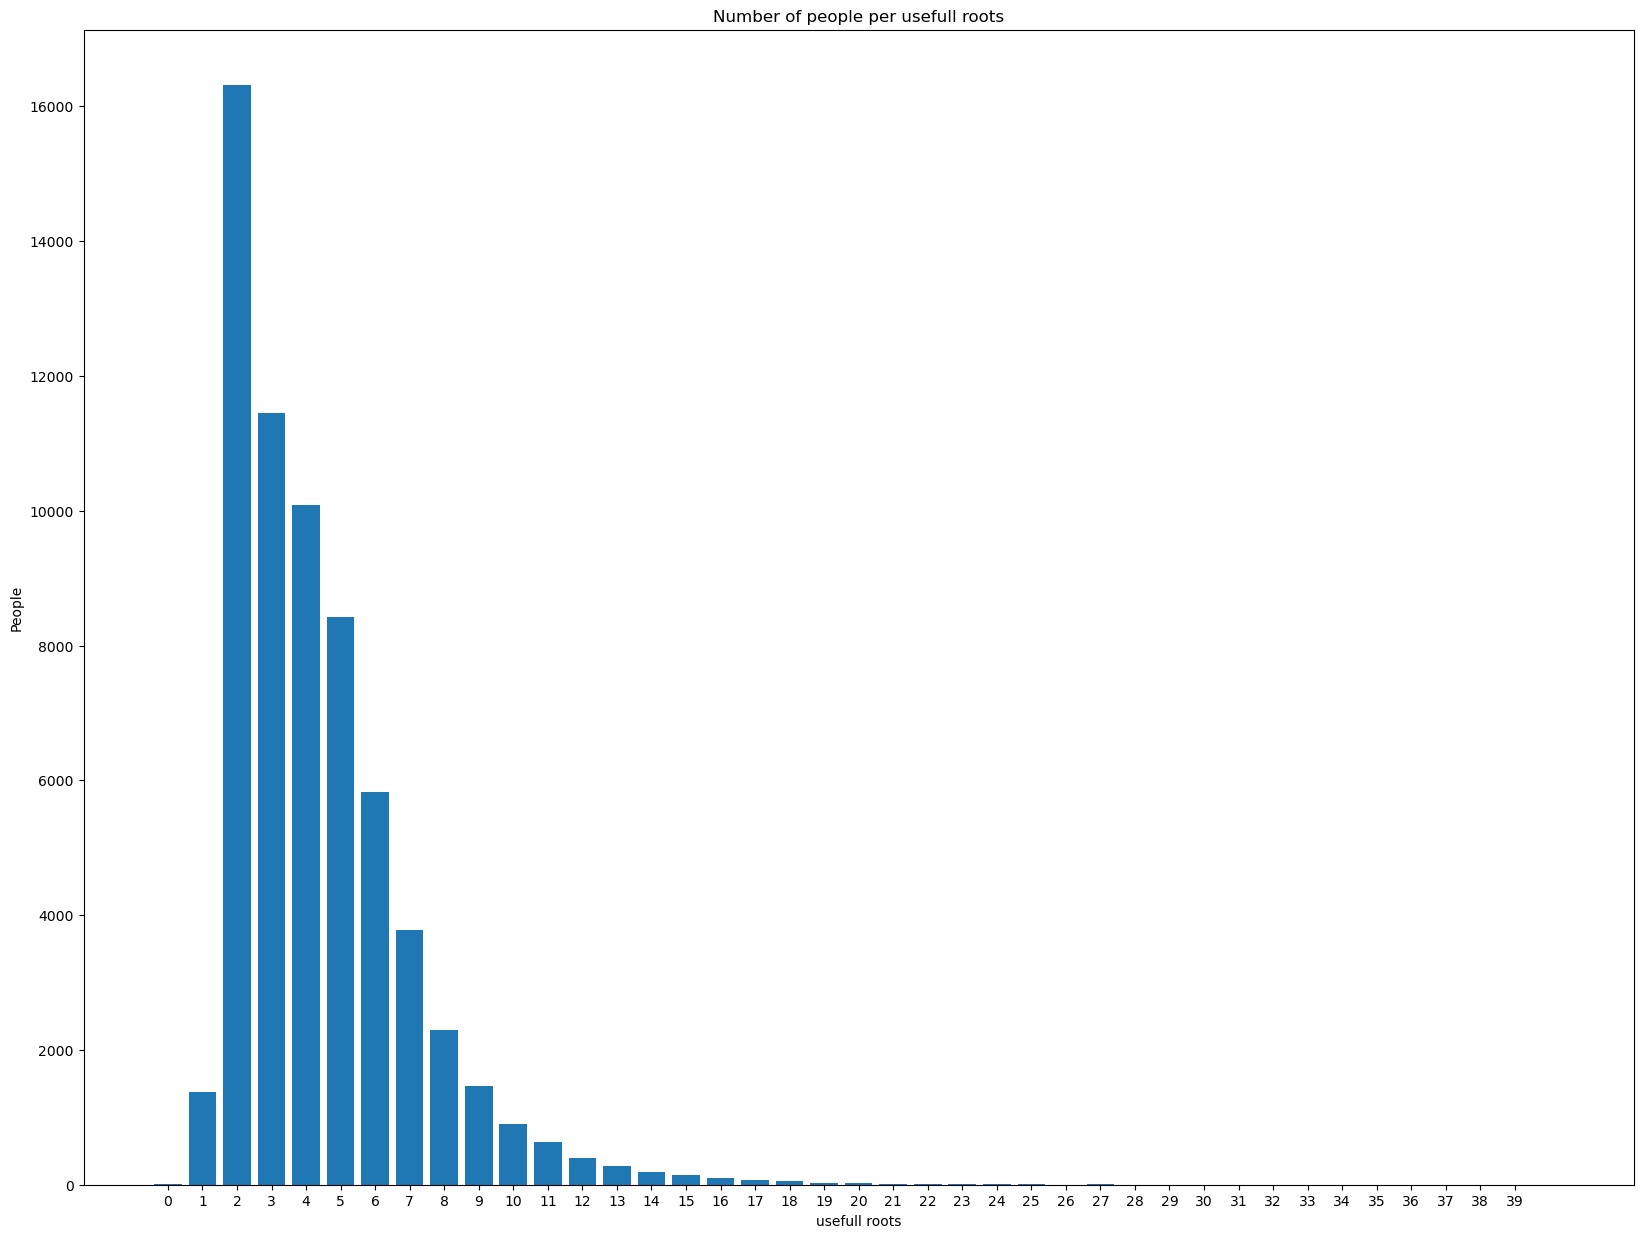

In [18]:
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(non_politic['useful roots'].max() + 1)))
stuff = [non_politic['useful roots'][non_politic['useful roots'] == x].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n,useful roots
1,BEZPP,2,2,"[trávit, komora, Čech, republika, lobby, mluvit]","[potravinářský, komora, český, republika, lobb...",True,False,6,6
2,BEZPP,1,2,"[umět, dirigovat]","[umělec, dirigent]",True,False,2,2
3,BEZPP,2,2,"[umět, bát]","[umělec, básnířka]",True,False,2,2
4,BEZPP,2,2,"[mluvit, rožnov, radhošten, umět, karta, tvořit]","[mluvčí, rožnov, radhošten, umělec, grafička, ...",True,False,6,6
5,BEZPP,1,2,"[hrát, umět]","[herec, umělec]",True,False,2,2
...,...,...,...,...,...,...,...,...,...
81619,BEZPP,2,2,"[vzít, řídit, gymnázium]","[odborník, ředitelka, gymnázium]",True,False,3,3
81620,BEZPP,1,2,"[sport, basebal]","[sport, baseballista]",True,False,2,2
81621,BEZPP,1,2,"[jednat, spolu, agrese, spol, r, sanovat, podn...","[jednatel, společnost, agrese, spol, r, asanač...",True,False,9,8
81622,BEZPP,1,2,"[sport, kužel, prezentovat]","[sport, kuželka, reprezentace]",True,False,3,3


Index(['party_name', 'gender', 'is_foreigner', 'roots', 'lemmatized',
       'is_labeled', 'is_pol', 'roots_n', 'useful roots'],
      dtype='object')

[0, 1146, 15784, 10656, 9098, 7437, 5040, 3260, 1981, 1301, 798, 588, 361, 257, 177, 135, 100, 66, 51, 24, 28, 14, 11, 8, 5, 8, 3, 4, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2]


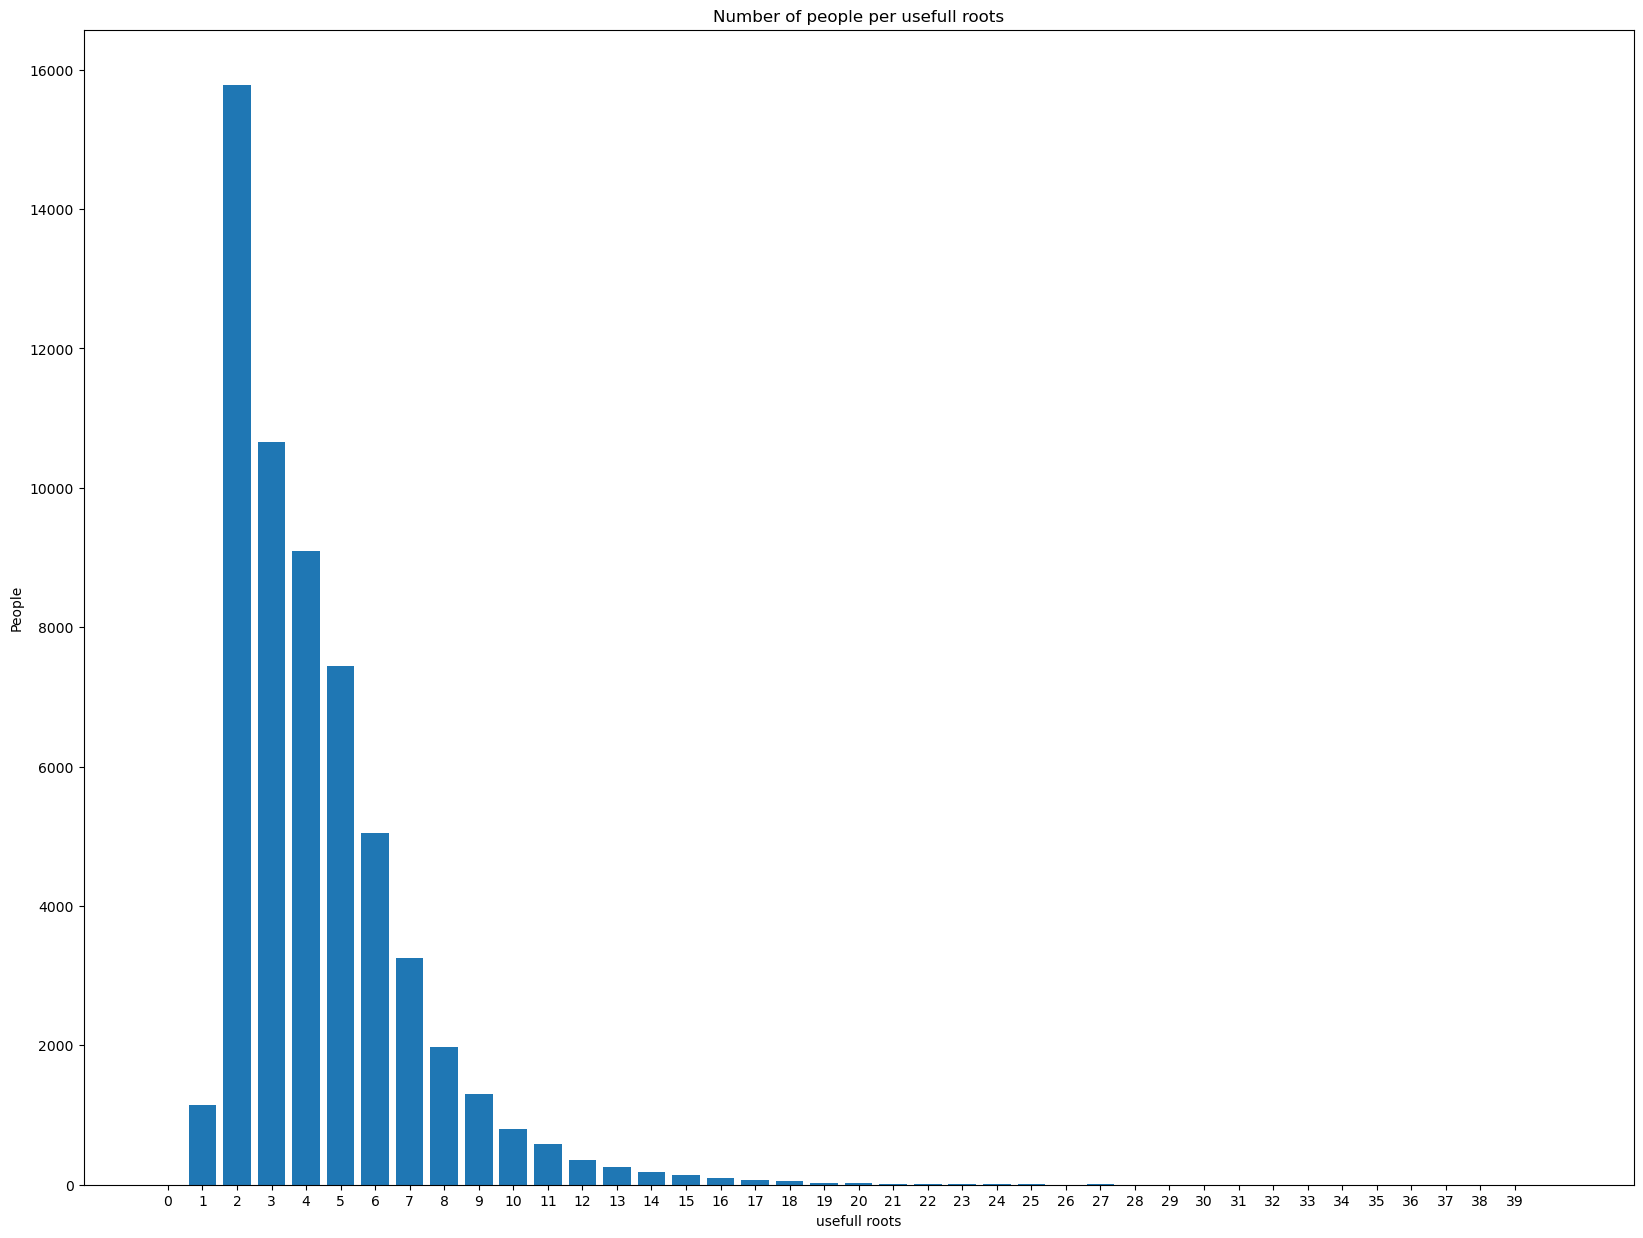

In [19]:
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(non_politic['useful roots'].max() + 1)))
unlabeled_non_pol = non_politic[non_politic.is_labeled]
display(unlabeled_non_pol)
display(unlabeled_non_pol.columns)
stuff = [unlabeled_non_pol['useful roots'][unlabeled_non_pol['useful roots'] == x].count() for x in indexes]
print(stuff)
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

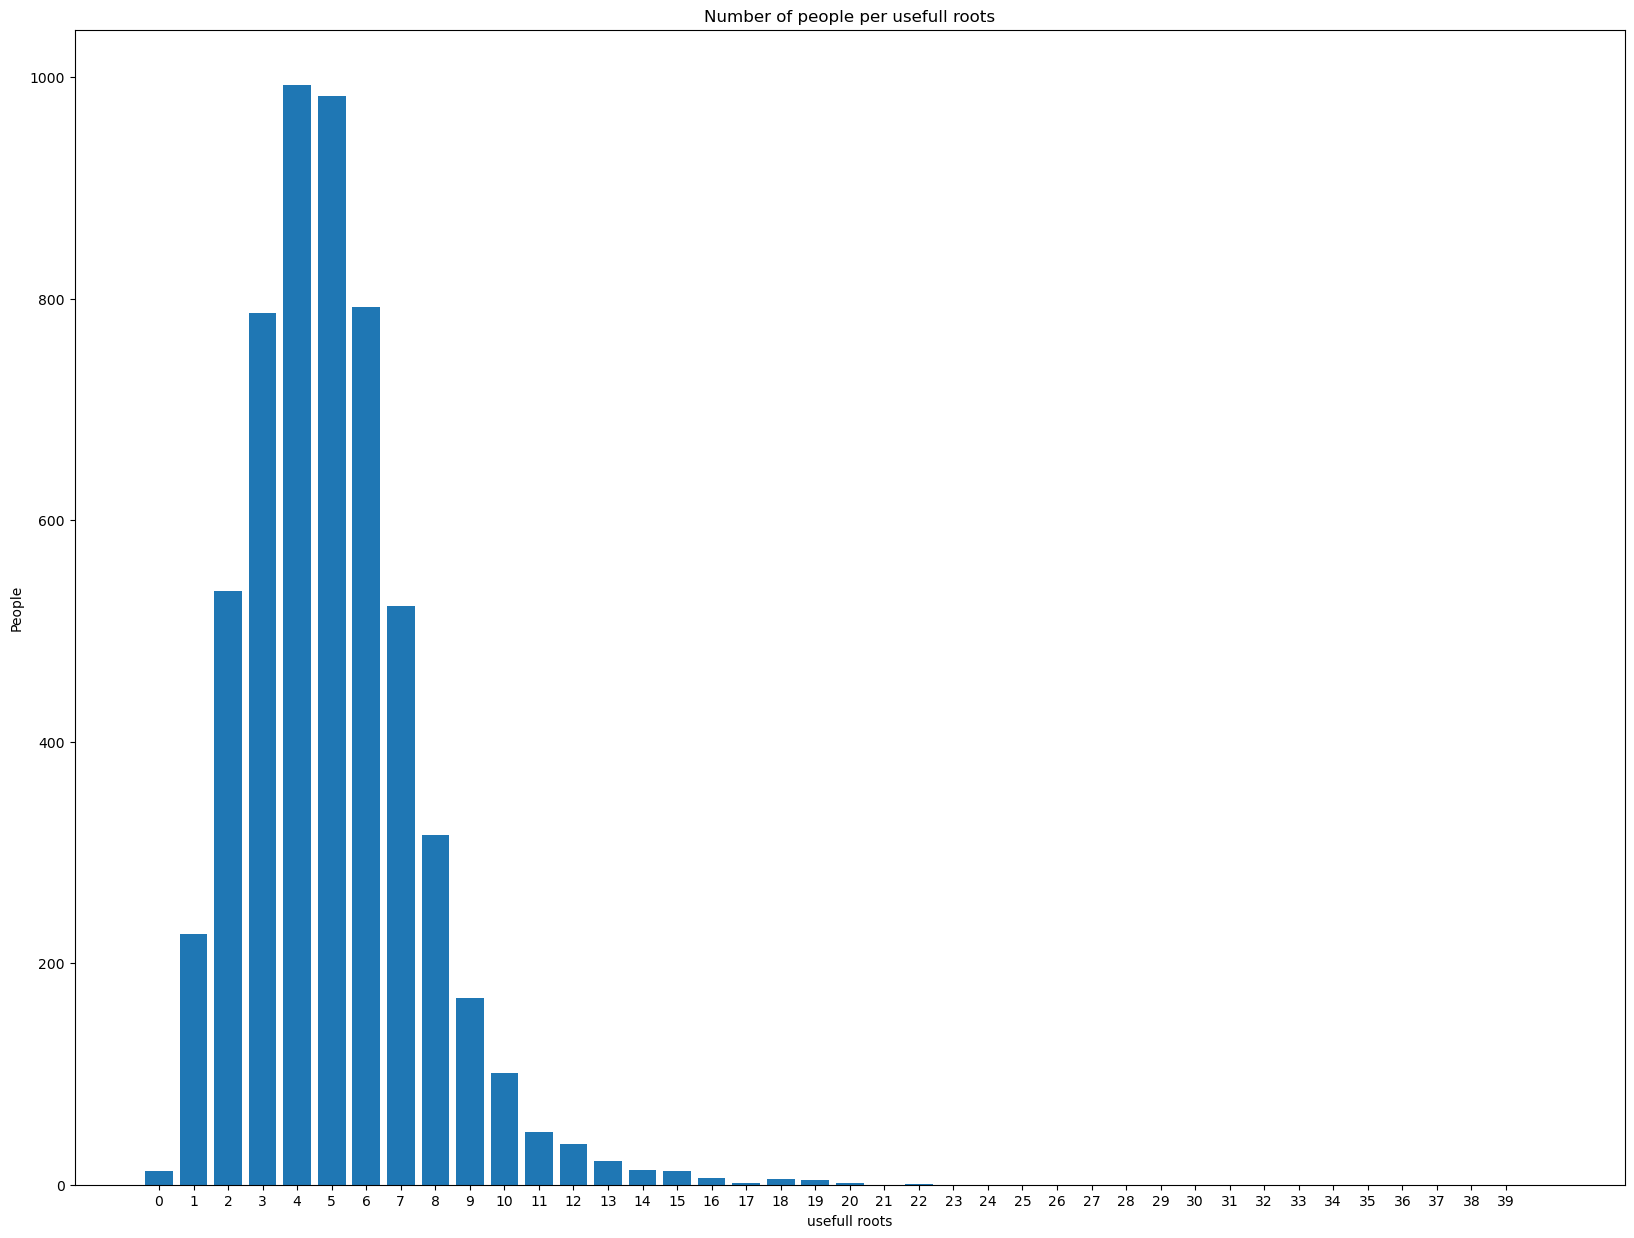

In [20]:
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(non_politic['useful roots'].max() + 1)))
stuff = [non_politic['useful roots'][non_politic['useful roots'] == x][~non_politic.is_labeled].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

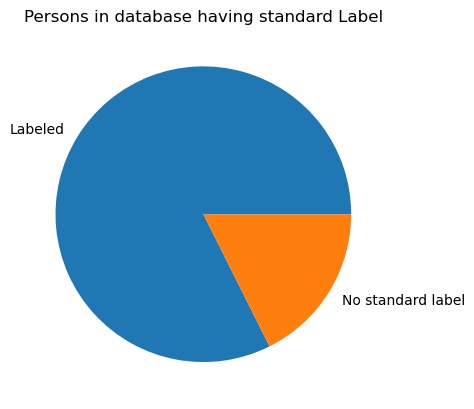

In [21]:
labels = 'Labeled', 'No standard label'
total_size = len(df.index)
labeled_size = df.is_labeled.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Persons in database having standard Label")
plt.show()

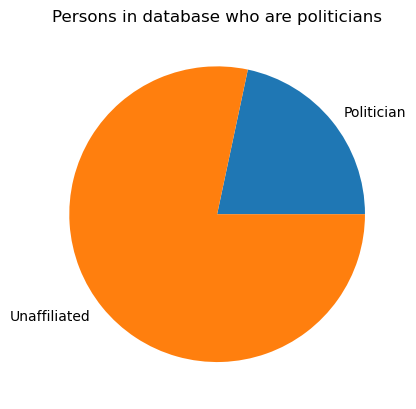

In [22]:
labels = 'Politician', 'Unaffiliated'
total_size = len(df.index)
labeled_size = df.is_pol.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Persons in database who are politicians")
plt.show()

In [23]:
non_politic_bag.sum().sort_values(ascending=False).head(20)

vzít        12398
sport        8495
umět         8303
zp           7015
registr      7005
řídit        6940
business     6854
kult         6821
spolu        4590
vést         4112
řada         3653
akademie     3619
zdravý       3570
mluvit       3087
nový         2986
čech         2697
tát          2504
sedět        2444
pravý        2062
hrát         1764
dtype: Sparse[int64, 0]

In [24]:
non_politic_bag[non_politic.is_labeled].sum().sort_values(ascending=False).head(20)

vzít        12074
sport        8470
umět         8271
business     6850
kult         6809
řídit        5726
spolu        4486
zp           4423
registr      4411
vést         3627
akademie     3596
řada         3566
zdravý       3493
mluvit       3080
nový         2966
čech         2428
tát          2339
sedět        2115
pravý        1779
hrát         1726
dtype: Sparse[int64, 0]

In [25]:
non_politic_bag[~non_politic.is_labeled].sum().sort_values(ascending=False).head(30)

registr        2594
zp             2592
sociál         1351
řídit          1214
no              572
vést            485
sedět           329
vzít            324
dům             288
pravý           283
učit            269
čech            269
centr           266
sociální        264
práce           256
nadace          189
plzeň           187
organizovat     171
ordinovat       167
tát             165
rada            164
sloužit         163
senior          150
charita         144
manager         135
dítě            130
projekt         130
být             128
město           118
škola           114
dtype: Sparse[int64, 0]

In [26]:
print(len(non_politic_bag[~non_politic.is_labeled]))
print(len(non_politic_bag[non_politic.is_labeled]))

5588
58351


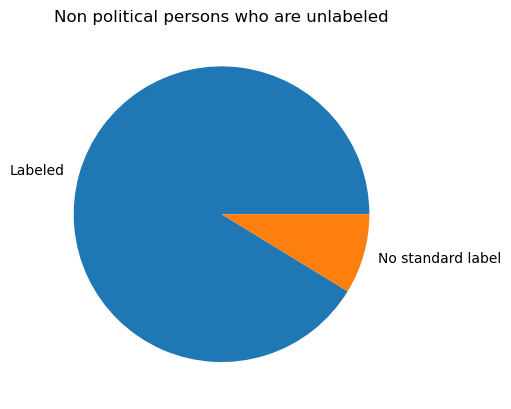

In [27]:
labels = 'Labeled', 'No standard label'
total_size = len(non_politic)
labeled_size = non_politic.is_labeled.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Non political persons who are unlabeled")
plt.show()

In [28]:
politic = df[df.is_pol].copy()

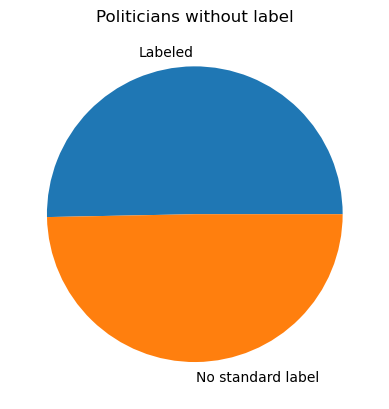

In [29]:
labels = 'Labeled', 'No standard label'
total_size = len(politic)
labeled_size = politic.is_labeled.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Politicians without label")
plt.show()

In [30]:
non_politic_bag.sum().sort_values(ascending=True).head(20)

žďársko         2
jablotron       2
jablonný        2
spravedlivý     2
jabkenice       2
spíš            2
squash          2
israel          2
squater         2
island          2
iráčan          2
irán            2
srbsko          2
irsku           2
iron            2
iris            2
srnec           2
inzert          2
intelligence    2
interagovat     2
dtype: Sparse[int64, 0]

In [31]:
with open('model/non_pol_columns', 'wb') as f:
    pickle.dump(non_politic_bag.columns, f)

In [32]:
from scipy.sparse import csr_matrix

data_matrix = csr_matrix(non_politic_bag.sparse.to_coo())

In [33]:
from sklearn.cluster import KMeans

def kmean_explore(data, max_clusters: int) -> list:
    scores = []
    
    for i in range(2, max_clusters+1):
        km = KMeans(n_clusters=i, n_init=10)
        km.fit(data_matrix)
        score = km.score(data_matrix)
        scores.append(np.abs(score))
    return scores

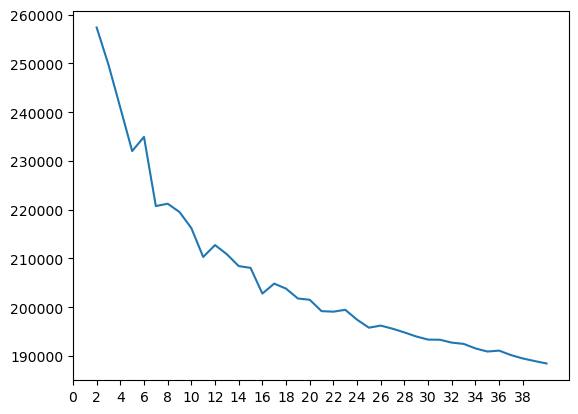

CPU times: user 4min 58s, sys: 6min 10s, total: 11min 9s
Wall time: 52.9 s


In [34]:
%%time
max_cluster = 40
cluster_n = list(range(2, max_cluster+1))
scores = kmean_explore(data_matrix, max_cluster)

plt.plot(cluster_n, scores)
plt.xticks(list(range(0, max_cluster, 2)))
plt.show()

In [35]:
km = KMeans(n_clusters=18, n_init=10)

predictions = km.fit_predict(data_matrix)

In [36]:
for a in set(predictions):
    print(a)
    print(len(non_politic_bag[predictions == a]))
    display(non_politic_bag[predictions == a].sum().sort_values(ascending=False).head(20))
    print('\n\n\n')

0
2808


spolu          2799
sedět          1122
čech            536
club            320
vázat           290
člen            224
asociovat       220
družit          210
vzít            210
řídit           157
lobby           142
sport           126
vést            120
organizovat     109
zdravý          103
čr               99
obec             91
no               90
přítel           89
kult             81
dtype: Sparse[int64, 0]





1
5434


kult           5434
muzeum         1030
řídit           960
kurátor         883
vzít            843
festival        482
vést            466
tát             417
umět            319
kniha           299
organizovat     293
drama           288
historie        264
dívat           225
galerie         210
město           205
řada            161
autor           156
kastelán        155
čech            150
dtype: Sparse[int64, 0]





2
2744


řada        2744
vzít         899
vést         819
řídit        500
město        406
správa       236
kraj         215
díl          207
pravý        201
magistr      163
mít          155
střed        152
ministr      150
čech         141
práce        131
sloužit      121
kult         120
žít          115
náměstek     110
rozvoj       109
dtype: Sparse[int64, 0]





3
6992


nový            1892
brojit           944
církev           802
čro              771
pravý            734
redigovat        620
chránit          575
stát             496
advokát          421
policie          365
no               349
zastoupit        331
vést             316
fara             302
aktivní          288
velet            279
soudit           275
hasit            243
čech             199
publicistika     189
dtype: Sparse[int64, 0]





4
7793


vzít            7793
řídit            954
historie         585
architektura     432
učit             431
vést             378
škola            356
tát              242
id               238
psychologie      224
archeologie      179
rada             173
restaurovat      161
umět             157
pravý            156
koumat           155
čech             151
střed            147
autor            144
zdravý           141
dtype: Sparse[int64, 0]





5
1985


řídit        1985
business     1429
spolu         196
stát          165
brojit        155
generel       140
jít           131
učit          109
čech          101
konat          89
no             85
kraj           80
tát            79
id             69
firma          64
vzít           63
marketing      60
vézt           58
centr          58
policie        55
dtype: Sparse[int64, 0]





6
5909


sport          5909
hokej          1209
trenér          978
vést            315
volejbal        296
basketbal       267
hodit           222
cyklistika      199
tennis          196
atletika        186
lyže            185
florbal         180
řídit           153
čech            149
běžet           141
být             133
sedět           130
prezentovat     116
spolu            97
organizovat      97
dtype: Sparse[int64, 0]





7
562


id             562
sport          200
business       156
spolu           58
trenér          56
vést            44
nový            33
církev          29
vzít            28
hokej           24
brojit          24
řídit           24
jednat          23
čech            22
pravý           21
manager         20
chránit         17
organizovat     17
mít             16
sedět           16
dtype: Sparse[int64, 0]





8
4619


business      4619
spolu          505
mít            474
manager        342
vést           333
jednat         319
vzít           302
stát           296
mluvit         262
firma          260
tát            199
vézt           194
sedět          173
čech           150
kult           150
podniknout     142
pravý          116
zastoupit      106
sport           99
jít             94
dtype: Sparse[int64, 0]





9
1729


mluvit       1729
tiskat        256
brojit        186
policie       147
řada          144
kult          137
kraj          119
město         100
chránit        80
čech           66
id             60
spolu          55
soudit         55
festival       51
čr             50
zastoupit      50
rada           48
ministr        47
práh           46
díl            44
dtype: Sparse[int64, 0]





10
392


kládat         392
vzít           325
škola          129
řídit          117
učit            63
kult            29
umět            28
id              21
no              18
organizovat     15
aktivní         14
projekt         13
mateř           12
sedět           12
spolu           11
čech            11
rada            11
nadace          10
redigovat       10
nový            10
dtype: Sparse[int64, 0]





11
1529


sociál         1529
řídit           531
vést            313
dům             265
sociální        250
centr           197
charita         197
práce           193
senior          143
sloužit         129
ordinovat       103
církev           94
dítě             84
pečovat          75
rada             64
organizovat      56
projekt          55
dom              51
rod              50
id               46
dtype: Sparse[int64, 0]





12
431


čr          430
akademie    302
tát         235
vědět       117
vzít        102
brojit       57
zp           47
registr      46
policie      41
vést         34
biologie     30
centr        30
řídit        28
čech         27
historie     27
díl          27
koumat       26
práce        26
vyslat       25
fyzický      22
dtype: Sparse[int64, 0]





13
2857


zdravý        2855
lék           1109
moci           601
prima          353
klinika        238
díl            237
sestřenice     222
řídit          183
vést           174
centr          127
dítě           113
fakulta        108
id             101
tát             99
vrch            87
vzít            81
oko             81
urologie        80
chirurgie       79
přední          78
dtype: Sparse[int64, 0]





14
1439


fotbal      1439
sport       1434
trenér       187
zp           146
registr      146
být           91
fungovat      44
id            39
sigm          38
olomouc       33
spolu         33
čech          30
mrk           29
sedět         28
rozhodit      28
club          27
mladý         24
brána         23
karviná       22
desky         21
dtype: Sparse[int64, 0]





15
6726


registr     6726
zp          6726
řídit       1177
vzít        1021
mluvit       863
čech         680
sport        502
nový         496
umět         482
sedět        478
business     448
spolu        444
pravý        439
kult         430
vést         419
řada         412
tát          373
být          369
plzeň        334
čr           333
dtype: Sparse[int64, 0]





16
2787


akademie       2787
univerzita      758
fakulta         625
vzít            598
tát             503
uk              400
vědět           328
katedra         303
vést            226
čt              210
děkan           171
koumat          170
čech            168
historie        158
karlov          144
studio          141
všechen         121
přírodověda     117
pedagogie       107
centr           104
dtype: Sparse[int64, 0]





17
7203


umět          7203
hrát          1354
režie          707
tvořit         501
psát           493
housle         492
zpívat         482
fotografie     400
malovat        393
kult           334
autor          232
dívat          192
socha          173
tanec          152
id             140
muzika         131
kapela         129
skládat        125
scéna          115
bát            109
dtype: Sparse[int64, 0]

In [37]:
with open('model/non_pol.model', 'bw+') as f:
    pickle.dump(km, f)

In [38]:
normal_bag = to_bag_of_words(df.lemmatized, is_string=False)[~df.is_pol]

In [39]:
for a in set(predictions):
    print(a)
    print(len(normal_bag[predictions == a]))
    display(normal_bag[predictions == a].sum().sort_values(ascending=False).head(10))
    print('\n\n\n')

0
2808


spolek         2652
předseda        749
český           513
klub            298
svaz            283
předsedkyně     260
společnost      251
asociace        220
sdružení        194
člen            148
dtype: Sparse[int64, 0]





1
5434


kultura      5398
muzeum        978
odborník      693
ředitel       541
kurátorka     487
festival      475
vedoucí       421
ředitelka     408
kurátor       395
výstav        363
dtype: Sparse[int64, 0]





2
2744


úředník     2583
vedoucí      790
odbor        678
ředitel      337
úřad         333
město        239
odborník     210
oddělení     207
správa       207
městský      167
dtype: Sparse[int64, 0]





3
6992


novinář       1877
ozbrojenec     944
církev         802
čro            771
záchranář      519
redaktor       426
advokát        412
právník        407
no             349
zástupce       285
dtype: Sparse[int64, 0]





4
7793


odborník     7386
ředitel       537
historik      409
ředitelka     394
vedoucí       353
architekt     321
škola         313
učitel        310
id            238
odbor         221
dtype: Sparse[int64, 0]





5
1985


ředitel       1522
byznys        1429
ředitelka      408
společnost     174
ozbrojenec     153
stát           139
generální      139
obchodní       110
učitel         105
český           89
dtype: Sparse[int64, 0]





6
5909


sport            5885
hokejista         969
trenér            815
hokej             164
trenérka          163
český             145
basketbalista     141
hokejový          135
ředitel           134
bývalý            132
dtype: Sparse[int64, 0]





7
562


id            562
sport         199
byznys        156
trenér         46
spolek         39
vedoucí        33
novinář        33
církev         29
ozbrojenec     24
odborník       24
dtype: Sparse[int64, 0]





8
4619


byznys        4612
společnost     420
majitel        355
vedoucí        305
jednatel       275
odborník       274
stát           269
mluvčí         262
firma          259
manažer        200
dtype: Sparse[int64, 0]





9
1729


mluvčí        1724
tiskový        251
ozbrojenec     185
kultura        136
policie        108
úředník        100
kraj            77
záchranář       65
id              60
úřad            59
dtype: Sparse[int64, 0]





10
392


odborník         310
základní         130
škola            128
překladatelka     97
překladatel       71
ředitelka         59
ředitel           58
učitel            57
zakladatel        52
zakladatelka      36
dtype: Sparse[int64, 0]





11
1529


sociál        1529
ředitelka      311
vedoucí        307
sociální       249
domov          217
ředitel        204
centr          197
charita        187
senior         142
pracovnice     141
dtype: Sparse[int64, 0]





12
431


čr             430
akademik       286
ústav          224
odborník        98
akademie        88
věda            87
ozbrojenec      57
zp              47
registrovat     46
policie         36
dtype: Sparse[int64, 0]





13
2857


zdravotník    2807
lékař          587
nemocnice      569
lékařka        374
primář         239
oddělení       234
sestra         222
klinik         201
vedoucí        170
ředitel        127
dtype: Sparse[int64, 0]





14
1439


sport          1434
fotbalista     1002
fotbalový       308
trenér          185
fotbal          173
zp              146
registrovat     146
bývalý           91
funkcionář       43
id               39
dtype: Sparse[int64, 0]





15
6726


zp             6726
registrovat    6726
ředitel         902
mluvčí          854
odborník        703
český           584
sport           475
novinář         469
byznys          446
umělec          439
dtype: Sparse[int64, 0]





16
2787


akademik      2744
univerzita     749
fakulta        622
odborník       536
ústav          464
uk             400
katedra        302
vedoucí        221
čt             210
věda           151
dtype: Sparse[int64, 0]





17
7203


umělec        7155
herec          763
herečka        561
režisér        514
kultura        333
fotograf       327
hudebník       295
spisovatel     273
zpěvačka       268
malíř          248
dtype: Sparse[int64, 0]

## Politician Analysis

In [40]:
politic_bag = to_bag_of_words(politic.roots, is_string=False)
politic_bag = politic_bag.loc[:, politic_bag.sum() > 1].copy()

In [41]:
politic_bag.sum().sort_values(ascending=False).head(20)

kandidát         9345
ex               6853
zastoupit        6624
obec             6539
poslat           5671
starat           3877
město            1481
řídit            1332
politika         1222
místostarosta    1180
zp               1139
registr          1136
kraj             1132
sport            1108
sedět            1095
vzít             1088
rada              846
akropole          825
umět              747
senát             745
dtype: Sparse[int64, 0]

In [42]:
len(politic)

17686

In [43]:
politic['useful roots'] = politic_bag.parallel_apply(lambda row: row.sum(), axis=1)

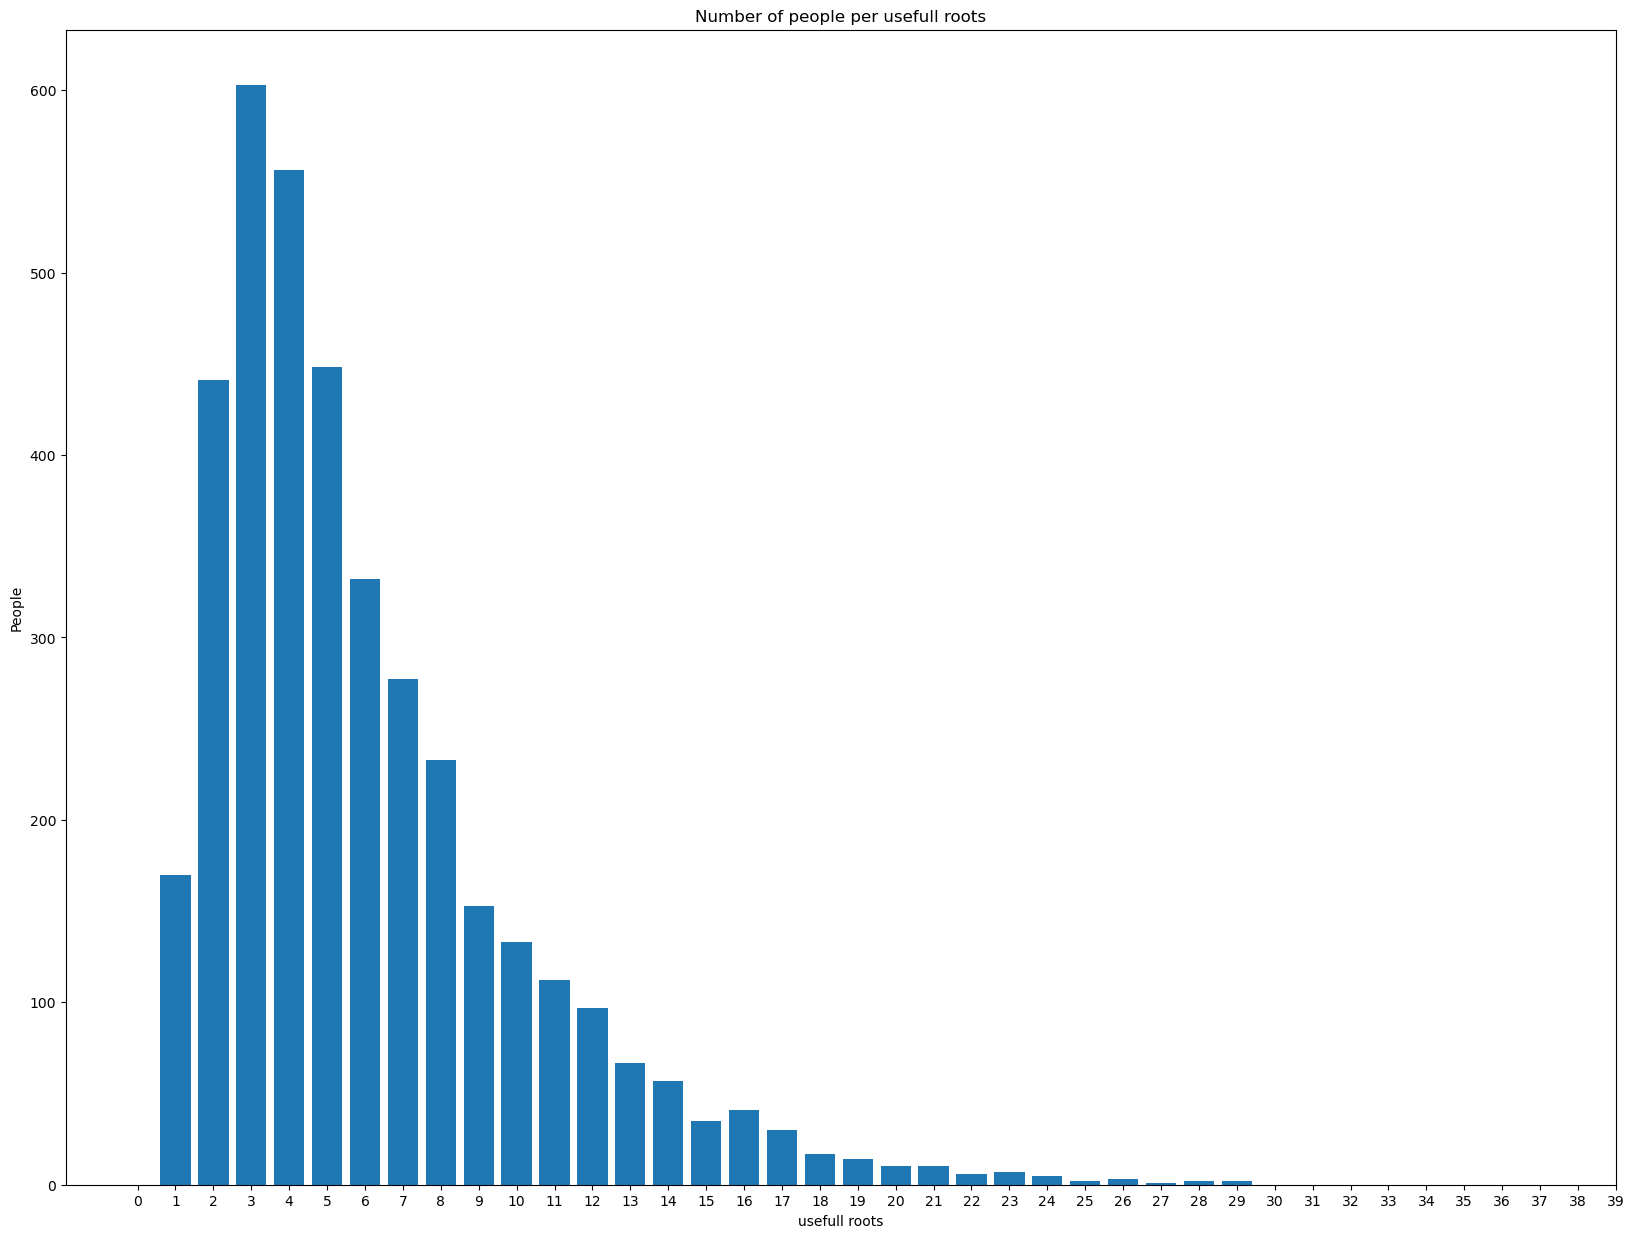

In [44]:
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(politic['useful roots'].max() + 1)))
stuff = [politic['useful roots'][politic['useful roots'] == x].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

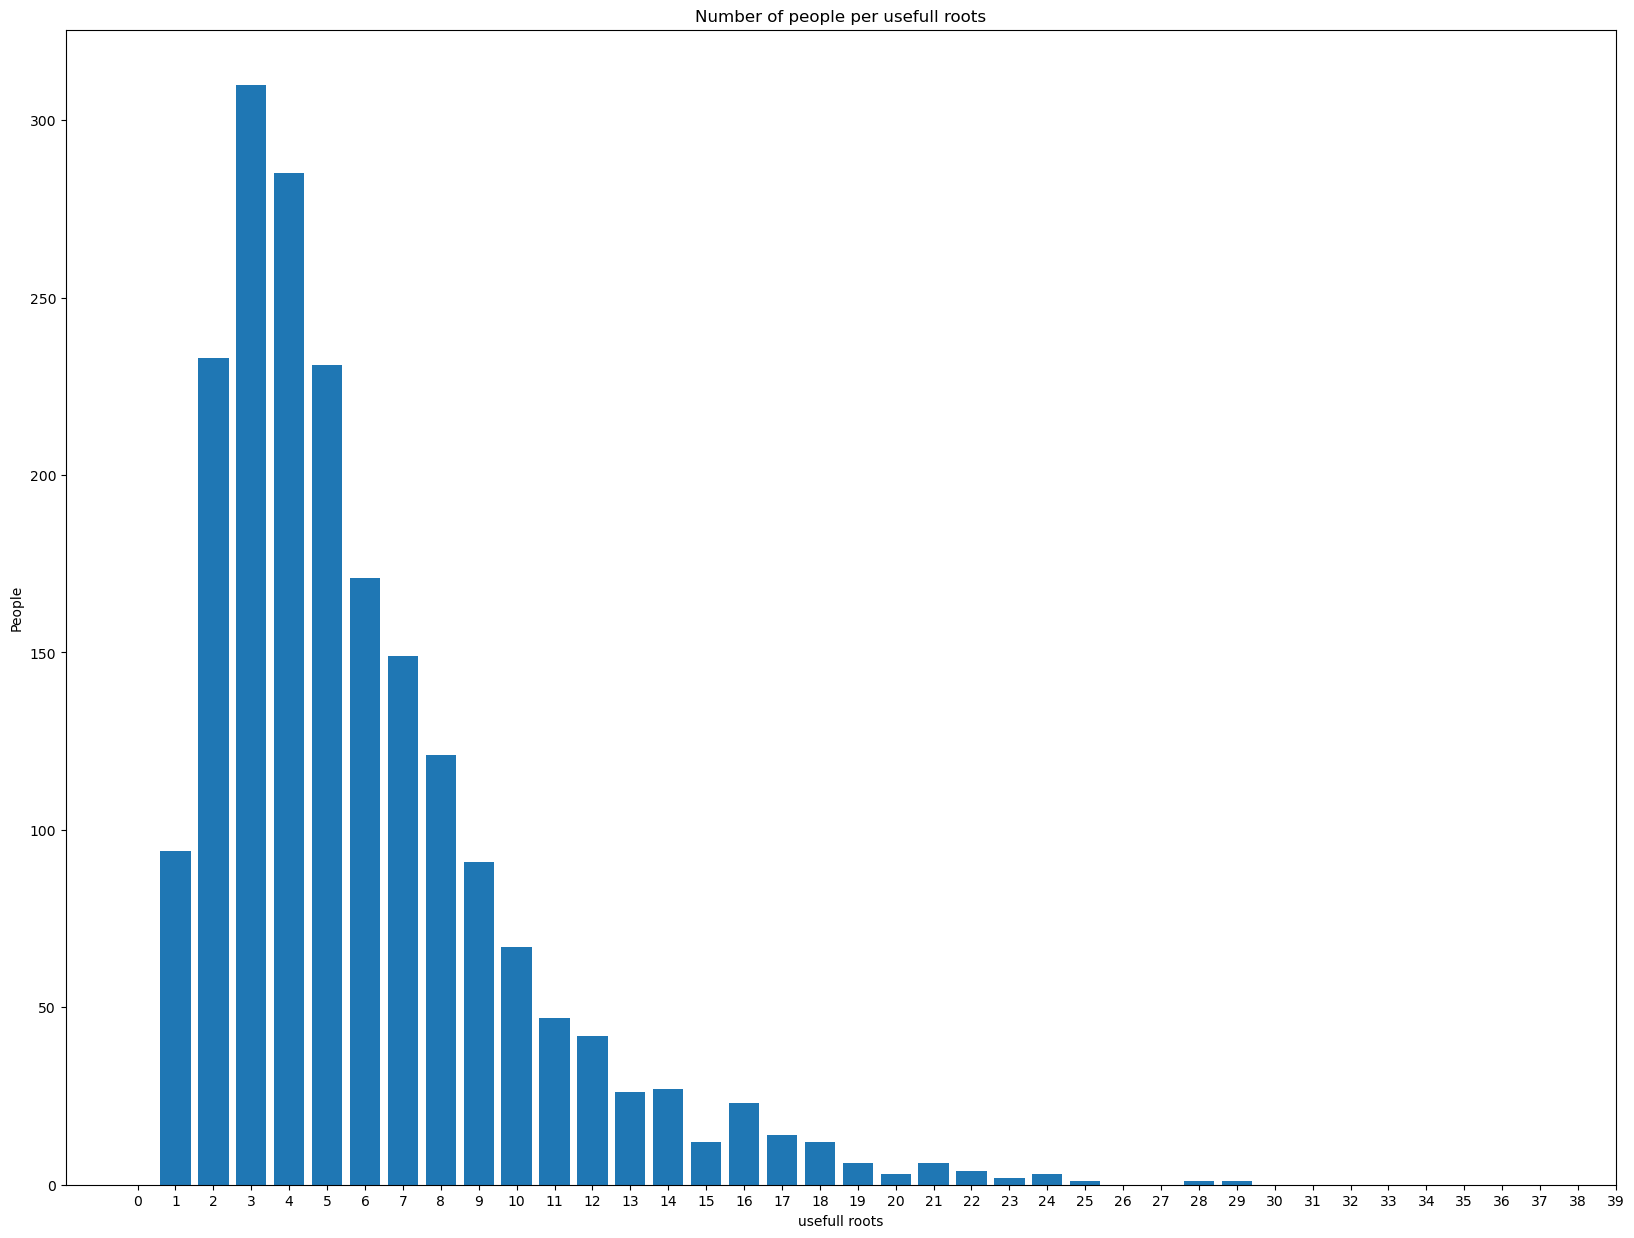

In [45]:
used = politic[politic.is_labeled]
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(politic['useful roots'].max() + 1)))
stuff = [used['useful roots'][used['useful roots'] == x].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

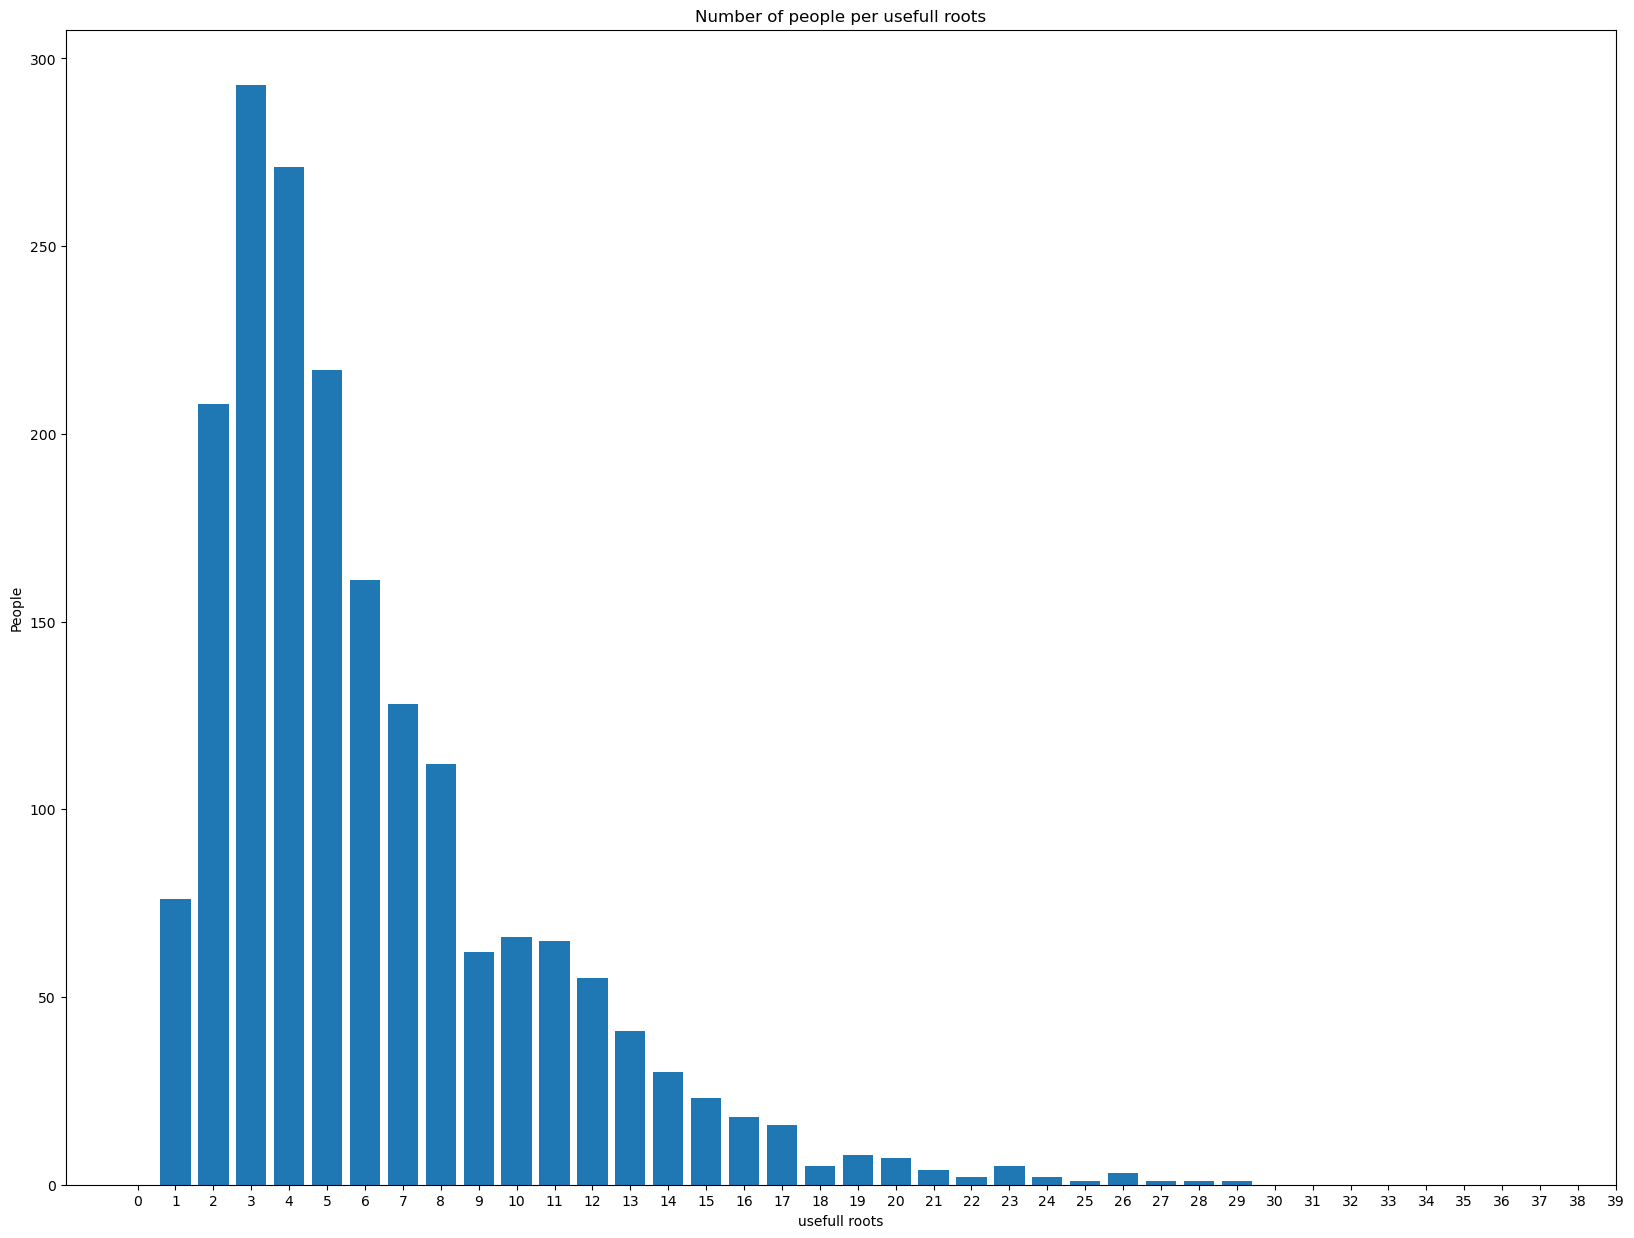

In [46]:
used = politic[~politic.is_labeled]
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(politic['useful roots'].max() + 1)))
stuff = [used['useful roots'][used['useful roots'] == x].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

In [47]:
with open('model/pol_columns', 'wb') as f:
    pickle.dump(politic_bag.columns, f)

In [48]:

data_matrix = csr_matrix(politic_bag.sparse.to_coo())

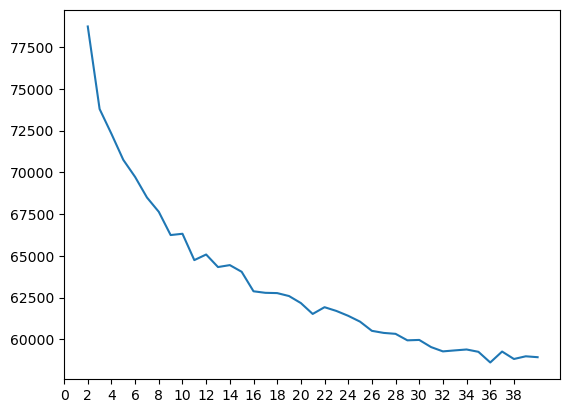

CPU times: user 3min 49s, sys: 5min 33s, total: 9min 23s
Wall time: 39.8 s


In [49]:
%%time
max_cluster = 40
cluster_n = list(range(2, max_cluster+1))
scores = kmean_explore(data_matrix, max_cluster)

plt.plot(cluster_n, scores)
plt.xticks(list(range(0, max_cluster, 2)))
plt.show()

In [50]:
km = KMeans(n_clusters=18, n_init=10)

predictions = km.fit_predict(data_matrix)

In [51]:
for a in set(predictions):
    print(a)
    print(len(politic_bag[predictions == a]))
    display(politic_bag[predictions == a].sum().sort_values(ascending=False).head(20))
    print('\n\n\n')

0
553


registr      553
zp           552
ex           532
obec         522
zastoupit    500
kandidát     453
poslat       279
kraj         211
starat       200
město        166
sedět        154
vzít         102
řídit         88
senát         87
rada          84
náměstek      79
být           66
čech          62
spolu         56
hejtman       53
dtype: Sparse[int64, 0]





1
2964


kandidát      2940
poslat        2865
co             184
podniknout     182
město          160
práce          159
pravý          148
učit           146
technika       145
manager        141
senát          137
zastoupit      137
vzít           131
sedět          126
živit          117
vést           114
pedagogie      110
rada           108
spolu          104
special        100
dtype: Sparse[int64, 0]





2
1888


obec             1887
kandidát         1885
ex               1880
zastoupit        1655
řídit             279
místostarosta     129
vzít              128
vést              128
technika          125
učit              110
spolu             104
manager           103
co                 93
viset              85
kult               81
pravý              79
lék                77
podniknout         75
čech               74
tát                74
dtype: Sparse[int64, 0]





3
26


bílý          26
starat        12
dom           10
mluvit         6
vzít           4
politika       3
amerika        3
historie       2
řídit          2
vést           2
kámen          2
prezident      2
stát           2
čech           2
tiskat         1
univerzita     1
obec           1
zastoupit      1
šéf            1
starý          1
dtype: Sparse[int64, 0]





4
896


sport          896
fotbal         317
trenér         147
hokej          147
basketbal       55
tennis          55
být             53
lyže            29
atletika        28
biatlon         26
pilot           26
cyklistika      22
šéf             18
volejbal        18
sedět           17
slovensko       15
business        15
vzít            12
mezinárodní     12
řídit           12
dtype: Sparse[int64, 0]





5
2888


politika     970
zastoupit    342
vzít         317
ministr      314
sedět        232
řídit        173
prezident    162
mluvit       157
business     150
nový         147
být          143
kult         142
rada         141
akademie     130
šéf          106
kraj         102
spolu        100
vyslat        95
slovensko     94
evropa        92
dtype: Sparse[int64, 0]





6
142


zdravý        135
kandidát      121
poslat         79
lék            67
senát          43
sestřenice     29
ex             28
vzít           17
moci           17
obec           14
kraj           12
prima          12
zastoupit      11
město          10
chránit         9
řídit           9
díl             9
sedět           8
člen            7
sport           7
dtype: Sparse[int64, 0]





7
294


kandidát     294
řídit        294
poslat       270
škola         46
zastoupit     34
spolu         33
senát         33
vzít          32
město         28
kládat        21
rada          17
dům           15
střed         15
vézt          12
tát           12
kraj          12
sloužit       11
zdravý        11
sedět         11
pedagogie     11
dtype: Sparse[int64, 0]





8
1623


obec             1623
zastoupit        1593
ex               1444
starat           1279
kandidát          428
místostarosta     154
družit             59
viset              51
sedět              51
spolu              50
rada               44
okres              41
čech               30
hora               27
řídit              27
vzít               27
senát              25
sen                24
být                24
prah               24
dtype: Sparse[int64, 0]





9
717


kandidát      717
ex            717
akropole      674
poslat        164
senát          75
podniknout     65
sedět          64
pravý          56
řídit          47
spolu          46
manager        42
rada           41
ekonomie       38
special        33
vést           31
učit           31
studovat       29
vzít           29
živit          28
co             27
dtype: Sparse[int64, 0]





10
558


registr      558
zp           558
poslat       186
kandidát     147
starat       124
sedět        119
být          111
vzít          73
senát         72
řídit         65
ministr       63
politika      58
čr            56
ex            54
kraj          53
čech          52
zastoupit     52
město         51
rada          46
jmout         44
dtype: Sparse[int64, 0]





11
1568


starat       1568
obec          120
id             62
město          40
politika       30
hora           25
sokol          24
velký          23
dolů           18
spolu          15
sedět          15
zastoupit      14
nový           14
být            14
černý          13
družit         13
rada           11
vzít           11
čech           11
lhot           11
dtype: Sparse[int64, 0]





12
844


poslat           844
obec             842
kandidát         841
ex               811
zastoupit        790
starat           192
řídit            129
manager           82
spolu             80
sedět             73
místostarosta     71
prah              67
vzít              66
učit              60
rada              58
vést              56
podniknout        54
top               54
pedagogie         52
senát             52
dtype: Sparse[int64, 0]





13
227


jít           227
kandidát      227
poslat        225
zastoupit      25
manager        21
invalidní      18
řídit          17
spolu           9
město           8
chránit         7
práce           6
podniknout      6
starý           6
zvíře           6
vést            6
technika        6
co              5
rada            5
hrana           5
hradit          4
dtype: Sparse[int64, 0]





14
437


místostarosta    437
obec              72
zastoupit         60
id                22
město             19
práh              15
rada              10
hora              10
velký              9
brno               9
čech               8
kult               8
hradit             8
družit             8
spolu              8
vzít               7
řídit              6
morava             6
být                6
viset              5
dtype: Sparse[int64, 0]





15
633


umět            633
režie           142
hrát            102
psát             86
zpívat           45
housle           42
kult             31
amerika          27
francie          26
dirigovat        22
opus             19
film             19
pět              18
vzít             17
tanec            15
slovensko        15
mřít             14
choreografie     14
brit             12
bát              12
dtype: Sparse[int64, 0]





16
907


město            907
obec             900
zastoupit        870
kandidát         857
ex               848
poslat           496
starat           286
místostarosta    235
rada             125
kraj             122
řídit            107
sedět             81
primátor          73
náměstek          72
vzít              68
vést              67
senát             64
člen              57
spolu             54
řada              50
dtype: Sparse[int64, 0]





17
521


kraj             521
zastoupit        505
ex               493
obec             410
kandidát         394
poslat           196
starat            98
sedět             69
rada              68
náměstek          64
řídit             61
vzít              46
hejtman           45
senát             44
místostarosta     36
spolu             34
být               33
člen              31
čech              30
manager           26
dtype: Sparse[int64, 0]

In [52]:
norm_politic_bag = to_bag_of_words(politic.lemmatized, is_string=False)

In [53]:
for a in set(predictions):
    print(a)
    print(len(politic_bag[predictions == a]))
    display(norm_politic_bag[predictions == a].sum().sort_values(ascending=False).head(20))
    print('\n\n\n')

0
553


registrovat    553
zp             552
ex             532
obec           518
zastupitel     492
kandidát       453
poslanec       267
kraj           199
starosta       183
krajský        170
obecní         167
město          149
předseda        98
exposlanec      71
náměstek        70
senát           67
bývalý          65
ředitel         63
čr              53
výbor           53
dtype: Sparse[int64, 0]





1
2964


kandidát       2940
poslanec       2855
co              184
podnikatel      142
senát           136
město           129
technik         128
živnostník      106
vedoucí         102
pedagog         101
manažer         100
zastupitel       93
pracovník        86
starosta         81
předseda         79
učitel           77
specialista      75
it               71
učitelka         69
společnost       69
dtype: Sparse[int64, 0]





2
1888


kandidát         1885
ex               1880
obec             1880
zastupitel       1642
ředitel           210
místostarosta     119
vedoucí           118
technik           103
odborník           93
co                 93
manažer            89
závislý            84
kultura            77
učitel             76
prah               69
lékař              69
český              67
podnikatel         64
top                56
společnost         55
dtype: Sparse[int64, 0]





3
26


bílý          21
starosta      12
dom           10
mluvčí         6
odborník       4
bělat          3
americký       3
starostka      3
politik        2
ředitel        2
prezident      2
historik       2
český          2
kámen          2
spojený        1
univerzita     1
klíč           1
profesor       1
akademik       1
bělidlo        1
dtype: Sparse[int64, 0]





4
896


sport            892
fotbalista       191
trenér           142
hokejista        119
fotbalový         89
bývalý            53
fotbal            48
basketbalista     34
tenistka          30
pilot             26
tenista           20
cyklista          19
hokejový          19
atlet             19
šéf               17
hokej             16
byznys            15
lyže              14
slovenský         14
volejbalista      14
dtype: Sparse[int64, 0]





5
2888


politik       961
odborník      273
zastupitel    263
ministr       220
mluvčí        155
byznys        150
předseda      145
prezident     143
novinář       140
kultura       135
bývalý        129
akademik      126
ředitel       115
evropský       92
vyslanec       92
premiér        91
šéf            88
kraj           87
radní          85
americký       83
dtype: Sparse[int64, 0]





6
142


kandidát         121
poslanec          77
zdravotník        70
lékař             55
zdravotní         41
senát             39
sestra            29
ex                28
nemocnice         17
zdravotnický      16
lékařka           14
obec              14
zdravotnictví     13
oddělení           9
senátor            8
primář             8
ředitel            8
zastupitel         8
zdravý             8
město              8
dtype: Sparse[int64, 0]





7
294


kandidát      294
poslanec      270
ředitel       154
řidič          58
ředitelka      56
škola          45
senát          32
společnost     27
město          26
odborník       22
základní       16
zastupitel     15
zařízení       15
domov          13
střední        12
zástupce       11
bývalý         11
senior         10
gymnázium      10
sociál         10
dtype: Sparse[int64, 0]





8
1623


obec              1621
zastupitel        1590
ex                1444
starosta          1130
kandidát           428
starostka          279
místostarosta      139
sdružení            55
závislý             48
okres               40
předseda            40
zastupitelka        38
radní               36
obecní              34
spolek              32
místostarostka      28
český               24
prah                24
sen                 24
lídr                21
dtype: Sparse[int64, 0]





9
717


kandidát       717
ex             717
akropole       674
poslanec       162
senát           75
podnikatel      54
předseda        36
manažer         35
ekonom          28
specialista     27
co              27
živnostník      26
ředitel         26
pedagog         25
právník         25
vedoucí         25
evropský        25
strana          23
student         22
zp              21
dtype: Sparse[int64, 0]





10
558


registrovat      558
zp               558
poslanec         157
kandidát         147
bývalý           108
starosta         105
předseda          70
exposlanec        62
čr                56
ex                54
politik           54
ředitel           53
senát             49
poslanecký        46
místopředseda     46
ministr           45
český             43
pár               43
kraj              43
sněmovna          42
dtype: Sparse[int64, 0]





11
1568


starosta      1281
starostka      415
obec           112
id              62
politik         30
město           30
velký           23
sokol           21
horní           18
dolní           17
spolek          13
bývalý          13
nový            12
sdružení        12
český           11
zastupitel      11
okres           11
lhot            11
závislý         10
městys           9
dtype: Sparse[int64, 0]





12
844


poslanec         842
kandidát         841
obec             837
ex               811
zastupitel       774
starosta         150
ředitel           94
prah              67
manažer           65
místostarosta     61
starostka         56
top               54
vedoucí           51
podnikatel        51
pedagog           50
senát             48
předseda          47
společnost        44
učitel            43
živnostník        39
dtype: Sparse[int64, 0]





13
227


kandidát      227
poslanec      225
důchodce      112
obchodní       67
důchodkyně     24
invalidní      18
manažer        17
zástupce       16
obchod         15
ředitel        13
zastupitel      8
společnost      8
město           8
zvíře           6
zahraniční      5
co              5
starobní        5
podnikatel      5
ochránce        5
poradce         4
dtype: Sparse[int64, 0]





14
437


místostarosta     366
místostarostka    107
obec               71
zastupitel         59
id                 22
město              16
práh               15
velký               9
brno                9
český               8
sdružení            8
kultura             8
odborník            6
hradiště            5
brn                 5
hora                5
sázava              5
horní               5
spolek              5
závislý             5
dtype: Sparse[int64, 0]





15
633


umělec          619
režisér         116
herec            67
spisovatel       59
herečka          34
zpěvák           31
kultura          31
americký         27
spisovatelka     27
režisérka        27
hudebník         27
francouzský      26
dirigent         16
operní           16
smrt             14
zpěvačka         13
umělkyně         13
odborník         12
britský          12
slovenský        12
dtype: Sparse[int64, 0]





16
907


obec             900
kandidát         857
zastupitel       850
ex               848
město            758
poslanec         495
starosta         265
místostarosta    203
městský          138
kraj             107
radní             99
ředitel           88
krajský           85
obecní            75
primátor          70
předseda          62
náměstek          62
senát             55
zastupitelka      51
starostka         45
dtype: Sparse[int64, 0]





17
521


zastupitel       500
ex               493
kraj             466
krajský          433
obec             410
kandidát         394
obecní           229
poslanec         194
starosta          89
radní             62
náměstek          55
předseda          54
ředitel           48
hejtman           39
senát             38
místostarosta     33
bývalý            31
výbor             31
zastupitelka      27
liberecký         25
dtype: Sparse[int64, 0]

In [54]:
with open('model/pol.model', 'bw+') as f:
    pickle.dump(km, f)